In [11]:
using Graphs, IndexedGraphs, Statistics
using MatrixProductBP, MatrixProductBP.Models
using Plots, LaTeXStrings
using Measurements
import ProgressMeter; ProgressMeter.ijulia_behavior(:clear);

In [12]:
T = 300        # final time
k = 3         # degree
Δt = 1.0       # discretization
λ = 0.07      # rate of transmission
ρ = 0.1       # rate of recovery
γ = 0.3      # prob. of zero patient
N = 10^4;

In [13]:
seed = 0
gg = random_regular_graph(N, k; seed)
g = IndexedGraph(gg)

# adjust probabilities and number of discrete time steps to simulate continuous-time behavior
sis = SIS(g, λ*Δt, ρ*Δt, floor(Int, T/Δt); γ)

# set up MPBP computation
bp = mpbp(sis)
sms = SoftMarginSampler(bp);

In [4]:
nsamples = 10^3
sample!(sms, nsamples);

SoftMargin sampling 100%|████████████████████████████████| Time: 0:05:46


In [5]:
p = mean([x.val for x in y] for y in means((x, args...)->x-1, sms));

Marginals from Soft Margin  99%|████████████████████████▉|  ETA: 0:00:00

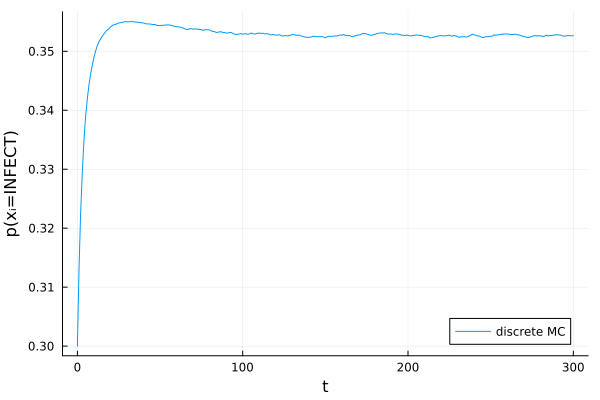

In [6]:
pl = plot(0:Δt:T, p, xlabel="t", ylabel="p(xᵢ=INFECT)", label="discrete MC")

In [7]:
p_ss = mean(p[end-100:end])

0.3526272425742597

## Gillespie

In [15]:
Δtplot = 1e-0
p_gill,_ = continuous_sis_sampler(sis, T, λ, ρ; nsamples = 10^3, sites=1:N,
    Δt=Δtplot, discard_dead_epidemics=false)
m_gill = mean(p_gill);

Progress: 100%|█████████████████████████████████████████| Time: 0:03:30


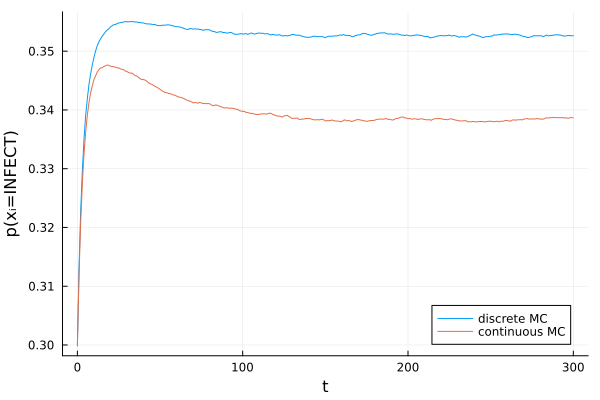

In [16]:
plot!(deepcopy(pl), 0:Δtplot:T, m_gill, label="continuous MC")

In [19]:
p_ss_cont = mean(m_gill[end-100:end])

0.33834699603960394